data query result type: <class 'list'> with 8760 elements
prep time 6.94 seconds; data vector length: 4380


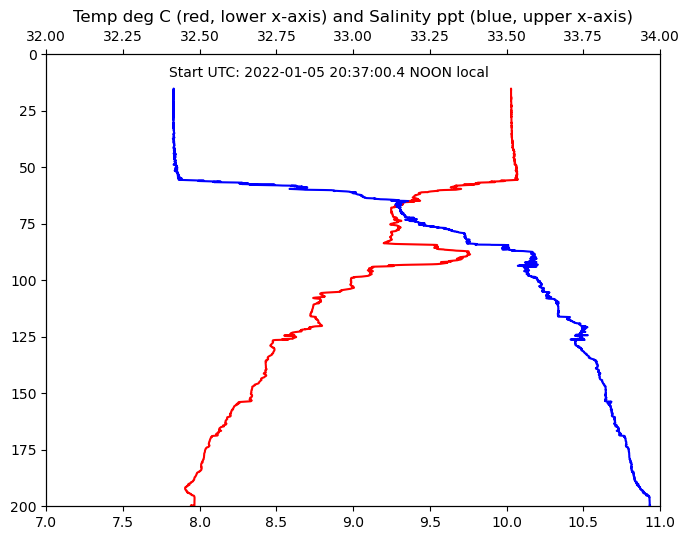

In [1]:
import oceanclient as oc
dfT, dfS = oc.Chart('2022-01-05', 9)

In [3]:
dfT

,Timestamp,depth,temp
0,2022-01-05 20:37:00.482559488,199.660778,7.943294
1,2022-01-05 20:37:01.482462720,199.662944,7.943356
2,2022-01-05 20:37:02.482989568,199.664009,7.943480
3,2022-01-05 20:37:03.482579456,199.659779,7.943480
4,2022-01-05 20:37:04.482899456,199.655482,7.943542
...,...,...,...
4375,2022-01-05 21:49:55.597626880,15.886139,10.028767
4376,2022-01-05 21:49:56.597320704,15.423047,10.028833
4377,2022-01-05 21:49:57.597327872,15.265456,10.028635
4378,2022-01-05 21:49:58.598376960,15.411262,10.028701


In [4]:
dfS

,Timestamp,depth,salinity
0,2022-01-05 20:37:00.482559488,199.660778,33.967098
1,2022-01-05 20:37:01.482462720,199.662944,33.967234
2,2022-01-05 20:37:02.482989568,199.664009,33.967048
3,2022-01-05 20:37:03.482579456,199.659779,33.966984
4,2022-01-05 20:37:04.482899456,199.655482,33.966795
...,...,...,...
4375,2022-01-05 21:49:55.597626880,15.886139,32.415099
4376,2022-01-05 21:49:56.597320704,15.423047,32.414741
4377,2022-01-05 21:49:57.597327872,15.265456,32.414862
4378,2022-01-05 21:49:58.598376960,15.411262,32.414864
